In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MSE: 6.98359599679207
MSE training: 7.064932738678533
MSE validation: 95.26463774928526
R^2: 0.35487662896130234
R^2 train: 0.3287483179470918


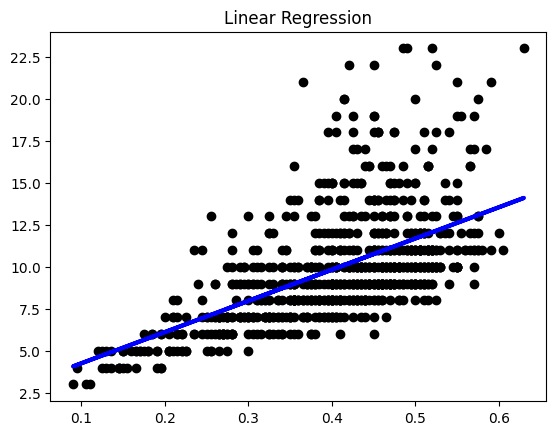

      Actual  Predicted
866        9  10.854998
1483       8  10.576414
599       16  10.669275
1702       9  11.505028
670       14   9.554939
2430      11   9.462077
1590       7   9.647800
949        6   9.369216
4026       7   7.604849
3668      10  11.040721
Variance: 3.545082158363125
MSE: 6.859520586128331
MSE training: 6.36167370802563
MSE validation: 104.36548248435763
R^2: 0.36633833826223705
R^2 train: 0.39556619501763235


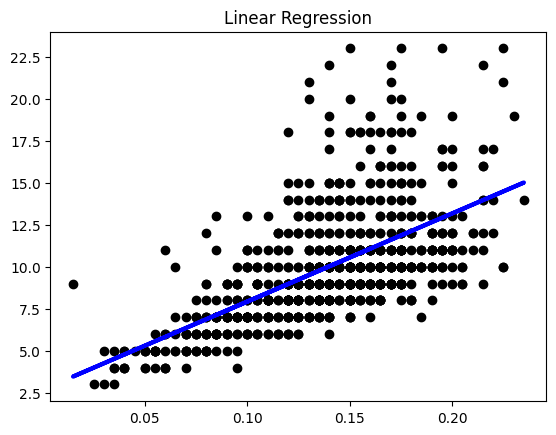

      Actual  Predicted
866        9  11.082988
1483       8  10.557970
599       16  12.920551
1702       9  11.608006
670       14  10.295461
2430      11  10.032951
1590       7   9.507933
949        6   8.720406
4026       7   7.407861
3668      10  10.295461
Variance: 4.180378170648712
MSE: 8.820565529613267
MSE training: 8.67728288132843
MSE validation: 94.05502927709766
R^2: 0.18518296712099003
R^2 train: 0.1755560958348077


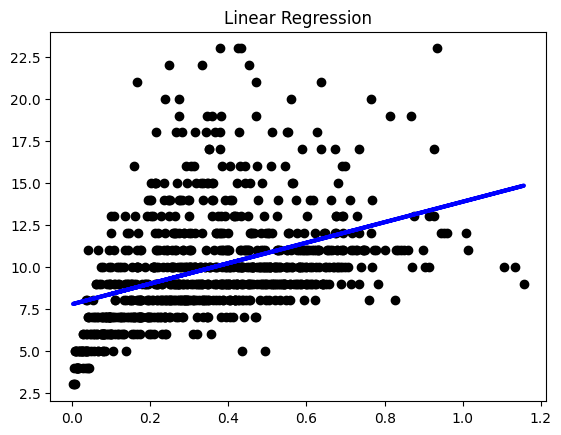

      Actual  Predicted
866        9  10.347682
1483       8  10.140175
599       16   9.639714
1702       9  11.064805
670       14   9.212492
2430      11   8.861560
1590       7   9.215544
949        6   9.734313
4026       7   8.306171
3668      10  10.417869
Variance: 1.7642560465268036
MEAN:  9.933684462532918
Total data points changed: 55


NEW DATA 


MSE: 7.194390383438333
MSE training: 7.201183307235648
MSE validation: 95.0708672324225
R^2: 0.3354040842476994
R^2 train: 0.3158029118537091


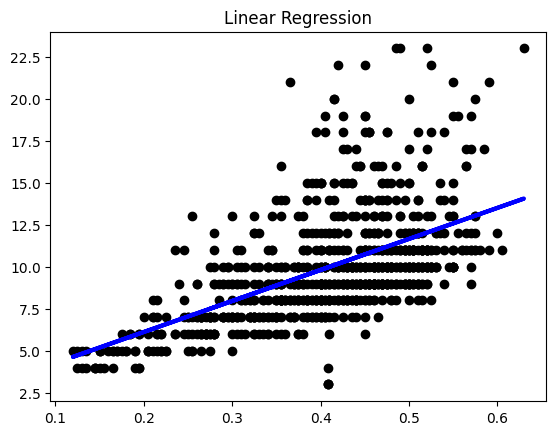

      Actual  Predicted
866        9  10.832983
1483       8  10.555905
599       16  10.648265
1702       9  11.479497
670       14   9.539955
2430      11   9.447596
1590       7   9.632314
949        6   9.355237
4026       7   7.600413
3668      10  11.017701
Variance: 3.353801131358262
MSE: 6.859805079211356
MSE training: 6.395486071732443
MSE validation: 101.56220940551903
R^2: 0.3663120576559644
R^2 train: 0.3923536228882297


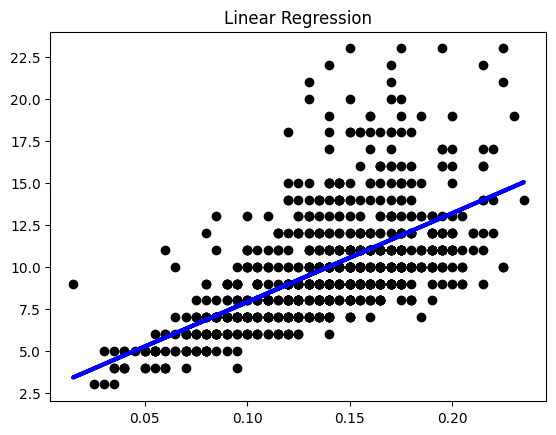

      Actual  Predicted
866        9  11.077884
1483       8  10.549194
599       16  12.928299
1702       9  11.606574
670       14  10.284849
2430      11  10.020504
1590       7   9.491813
949        6   8.698778
4026       7   7.377053
3668      10  10.284849
Variance: 4.239057615326444
MSE: 8.712331656069301
MSE training: 8.599271366126768
MSE validation: 94.45716223724662
R^2: 0.19518128337429752
R^2 train: 0.18296810706485467


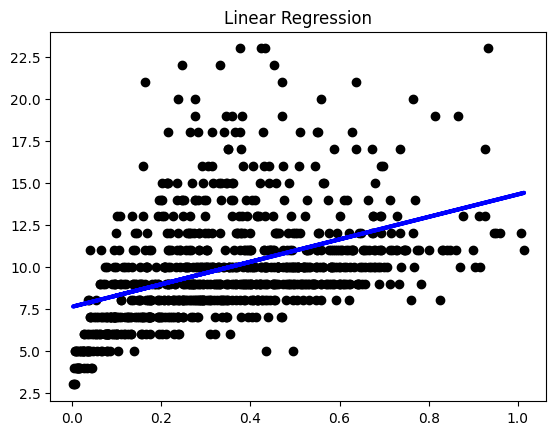

      Actual  Predicted
866        9  10.440550
1483       8  10.213013
599       16   9.664249
1702       9  11.226888
670       14   9.195792
2430      11   8.810988
1590       7   9.199138
949        6   9.767979
4026       7   8.201993
3668      10  10.517510
Variance: 2.0238039635323752


In [3]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt



columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

df = pd.read_csv('/content/drive/MyDrive/Stats/abalone.data', header=None, names=columns)

word_to_number = {
    'M':0,
    'F':1,
    'I':2
}

# cleaning data in Sex column
df['Sex'] = df['Sex'].map(word_to_number)

# assign features
feature1 = 'Diameter'
feature2 = 'Height'
feature3 = 'Shucked weight'

#print(df)

def graph(df,feature):

    X = df[[feature]]
    y = df['Rings']

    X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    mse = mean_squared_error(y_test, y_pred)
    mseTrain = mean_squared_error(y_train, y_pred_train)
    mseVal = mean_squared_error(X_val, y_pred_val)
    r2 = r2_score(y_test, y_pred)
    r2Train = r2_score(y_train, y_pred_train)

    print("MSE:", mse)
    print("MSE training:", mseTrain)
    print("MSE validation:", mseVal)
    print("R^2:", r2)
    print("R^2 train:", r2Train)

    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.title('Linear Regression')
    plt.show()

    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(comparison.head(10))

    variance = np.var(y_pred)

    print("Variance:", variance)

graph(df, feature1)
graph(df, feature2)
graph(df, feature3)

print("MEAN: ",df['Rings'].mean())

#transformation using z-scale
def normalizeData(df, features):
    #Clean data
    df_cleaned = df.copy()

    columns_to_process = features
    points = 0

    for column in columns_to_process:
        z_scores = np.abs(stats.zscore(df[column]))
        threshold = 3
        mean_value = df[column].mean()

        changed = np.sum(z_scores > threshold)
        points += changed

        df_cleaned.loc[z_scores > threshold, column] = mean_value

    print(f"Total data points changed: {points}")
    df_cleaned['Rings'] = df['Rings']
    return(df_cleaned)

columns=['Diameter', 'Height', 'Shucked weight']
newDF= normalizeData(df, columns)

print("\n\nNEW DATA \n\n")
graph(newDF, feature1)
graph(newDF, feature2)
graph(newDF, feature3)

Dataset: Abalone Liga al dataset: https://archive.ics.uci.edu/dataset/1/abalone

Este dataset y mi modelo son para resolver un problema de regresión. El objetivo es determinar la edad de los abalone a través del número de anillos que encontramos en ellos.

Modelo: Para mi solución utilizo un simple modelo de regresión lineal, este modelo no cuenta con hiper parámetros que se puedan configurar, así que la manera en la que puedo jugar con los resultados es a través de usar features distintas para la predicción.

Datos:

* Número de registros: 4177
* Número de características: 9
* Sex
* Length
* Diameter
* Height
* Whole weight
* Shucked weight
* Viscera weight
* Shell weight
* Rings

Clase de salida: Rings

Utilizando los valores de MSE puedo hacer una inferencia acerca del bias de mis datos.

|   Model   |   MSE (Validation) |   MSE (Training) |
|-----------|---------------------|------------------|
|   1       |   6.98359599679207 |   7.064932738678533 |
|   2       |   6.859520586128331 |   6.36167370802563 |
|   3       |   8.820565529613267 |   8.67728288132843 |


De estos valores puede observar que hay una cercanía entre 2 de los valores que obtuve del MSE y estos terminaron relativamente bajos así que puedo inferir que mi modelo tiene un bias medio/bajo ya que los datos que estoy prediciendo están saliendo relativamente cerca de los valores reales.

|       |   Variance |
|-------|------------|
|   1   |   2.2856   |
|   2   |   3.2063   |
|   3   |   2.1743   |


El valor de mi varianza implica que tengo un nivel bajo de varianza entre mis datos.
Para ver si mi modelo tiene underfitting, overfitting o es fitt revise el MSE de mis valores de entrenamiento y mis valores de varianza, como tengo un MSE bajo y una varianza baja puedo deducir que mi modelo es fit.

Para mejorar el rendimiento de mi modelo decidí utilizar una transformación en base a los valores de z. Calcule el valor z de cada punto en el dataset y en caso de tener un valor z mayor o menor de un número especificado, en mi caso 2 el valor se transforma a la media de mis datos.
Después de mi transformación obtuve las siguientes métricas de desempeño:

|   Model   |   MSE           |   R^2           |
|-----------|-----------------|-----------------|
|   1       |   8.430369853853804   |   0.22122805761968123   |
|   2       |   8.002499093269833   |   0.26075345793831617   |
|   3       |   8.882133216329688   |   0.17949553136156227   |


Puedo observar que mi MSE está más estandarizado, así que puedo inferir que mis datos están más normalizados. Lo que sí es que mis valores de R^2 están más cerca de 0 así que mi modelo empeoró en el sentido de cuanta de mi varianza es explicable por el modelo.
